<a href="https://colab.research.google.com/github/momorulezz/STA-4032-Portfolio/blob/main/Final%20Project%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Notebook - Spring 2024

In [ ]:
import matplotlib.pyplot as plt
import imageio
import torch
import torchvision
from torchvision import models, transforms
import numpy as np
from torchvision.models import *
from PIL import Image
import requests
from torchvision import models
from torchsummary import summary

In [ ]:
#typical plotting characteristics
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x,cmap='gray')
    ax.axis('off')
    fig.set_size_inches(20, 20)
    plt.show()

In [ ]:
im = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png')

<ipython-input-8-2086ec9e0cf6>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png')


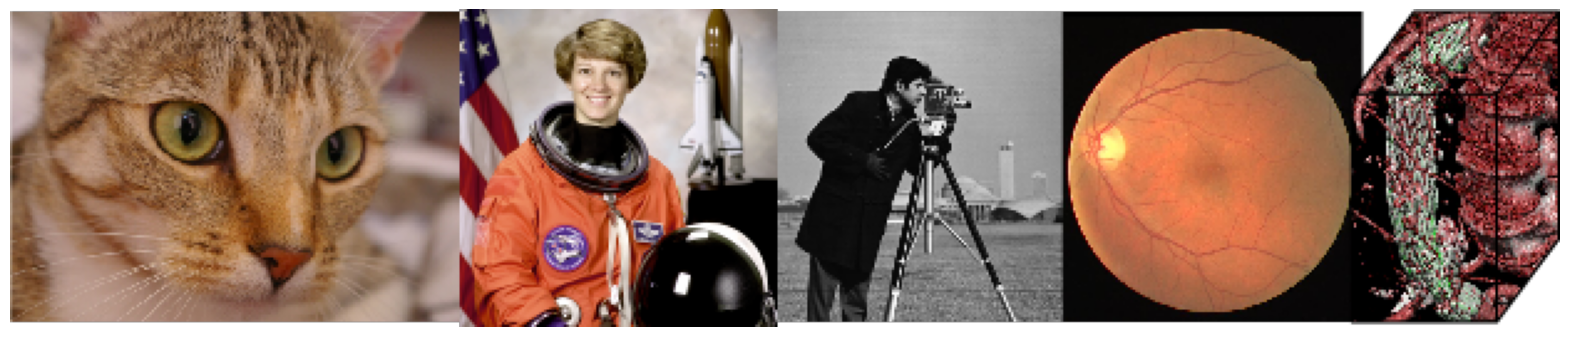

In [ ]:
plot(im)

In [ ]:
# This function call retrieves the AlexNet model with weights that have been pre-trained on a large dataset, usually ImageNet.
#.cuda(0): This method moves the AlexNet model to the GPU device indexed at 0. This is important for performance reasons, as GPUs allow for significantly faster computation compared to CPUs, especially beneficial for training and inference with deep neural networks.
net = alexnet(pretrained=True).cuda(0)

In [ ]:
#These transformations are commonly used to preprocess images for input into deep learning models that have been trained on ImageNet, such as AlexNet.
#This step adjusts the pixel values of the image.
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
#This function combines several transformations into a single operation.
preprocess = transforms.Compose([
     #This changes the size of the image to 256x256 pixels
   transforms.Resize(256),
     #This crops the image at the center to 224x224 pixels.
   transforms.CenterCrop(224),
     #
   transforms.ToTensor(),
   normalize
])

In [ ]:
im = imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg')

<ipython-input-34-772805ffc2cf>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg')


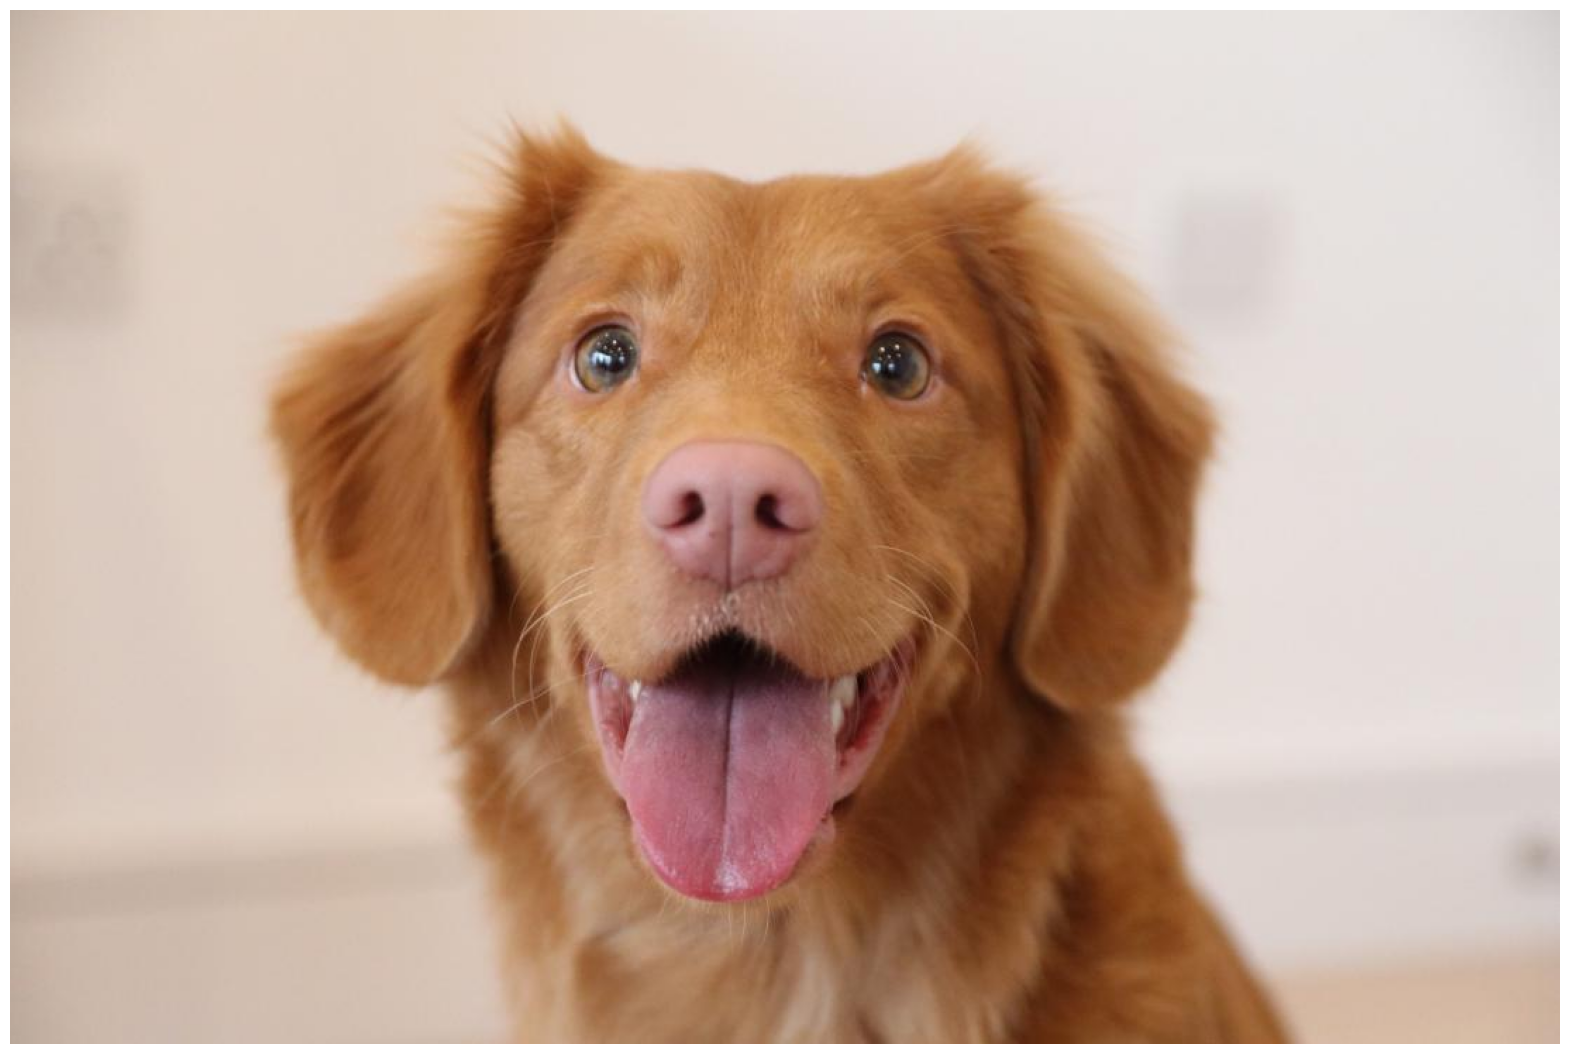

In [ ]:
plot(im)

In [ ]:
image = Image.fromarray(im) #convert to pil

In [ ]:
img_tensor = preprocess(image)

In [ ]:
#This function call adds a new dimension at the position specified by the argument (0 in this case), which represents the batch size. Applying unsqueeze_(0) to an image tensor with shape[3,224,224] tranforms to [1,3,224,224], where 1 is the batch size, indicating that there is one image in the batch.
img_tensor = img_tensor.unsqueeze_(0)

In [ ]:
img_tensor.shape

torch.Size([1, 3, 224, 224])

In [ ]:
img_variable = torch.tensor(img_tensor).cuda(0)

<ipython-input-40-a3c4eb55103d>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


In [ ]:
#ran into an error with it by running it after running codes out of order. This caused a 5D input to be cuased, instead of what it expected, which was 4D
out = net(img_variable)

In [ ]:
#convert the output of a neural network into a usable format and determine the class label with the highest probability (or score).
label_index = out.cpu().data.numpy().argmax()

In [ ]:
label_index

207

In [ ]:
#used to find the top 10 highest values in a PyTorch tensor output from a model, typically containing class scores or probabilities, and it outputs their indices in descending order.
top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])

In [ ]:
LABELS_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json'

In [ ]:
#creating a dictionary called labels by fetching JSON data from a specified URL and processing it into a key-value format where keys are integers and values are the corresponding labels from the JSON data.
#common when you need to map category IDs to their names, such as in classification tasks using pre-trained models.
labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()}

In [ ]:
print(labels[label_index])

golden retriever


In [ ]:
# used in scenarios like displaying the top predictions from a machine learning model after inference.
#top_list[i]: Here, top_list is assumed to be an array or list containing indices, which correspond to keys in the labels dictionary. Each index i in the loop retrieves the i-th element from top_list.
for i in range(10):
    print(labels[top_list[i]])

golden retriever
Sussex spaniel
Brittany spaniel
tennis ball
Tibetan mastiff
chow, chow chow
vizsla, Hungarian pointer
clumber, clumber spaniel
Irish setter, red setter
Norfolk terrier


In [ ]:
net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
summary(net, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [ ]:
#out is assigned the output from the first layer of the features module of a network net after processing an input tensor img_variable.
out = net.features[0](img_variable).cpu().detach().numpy()

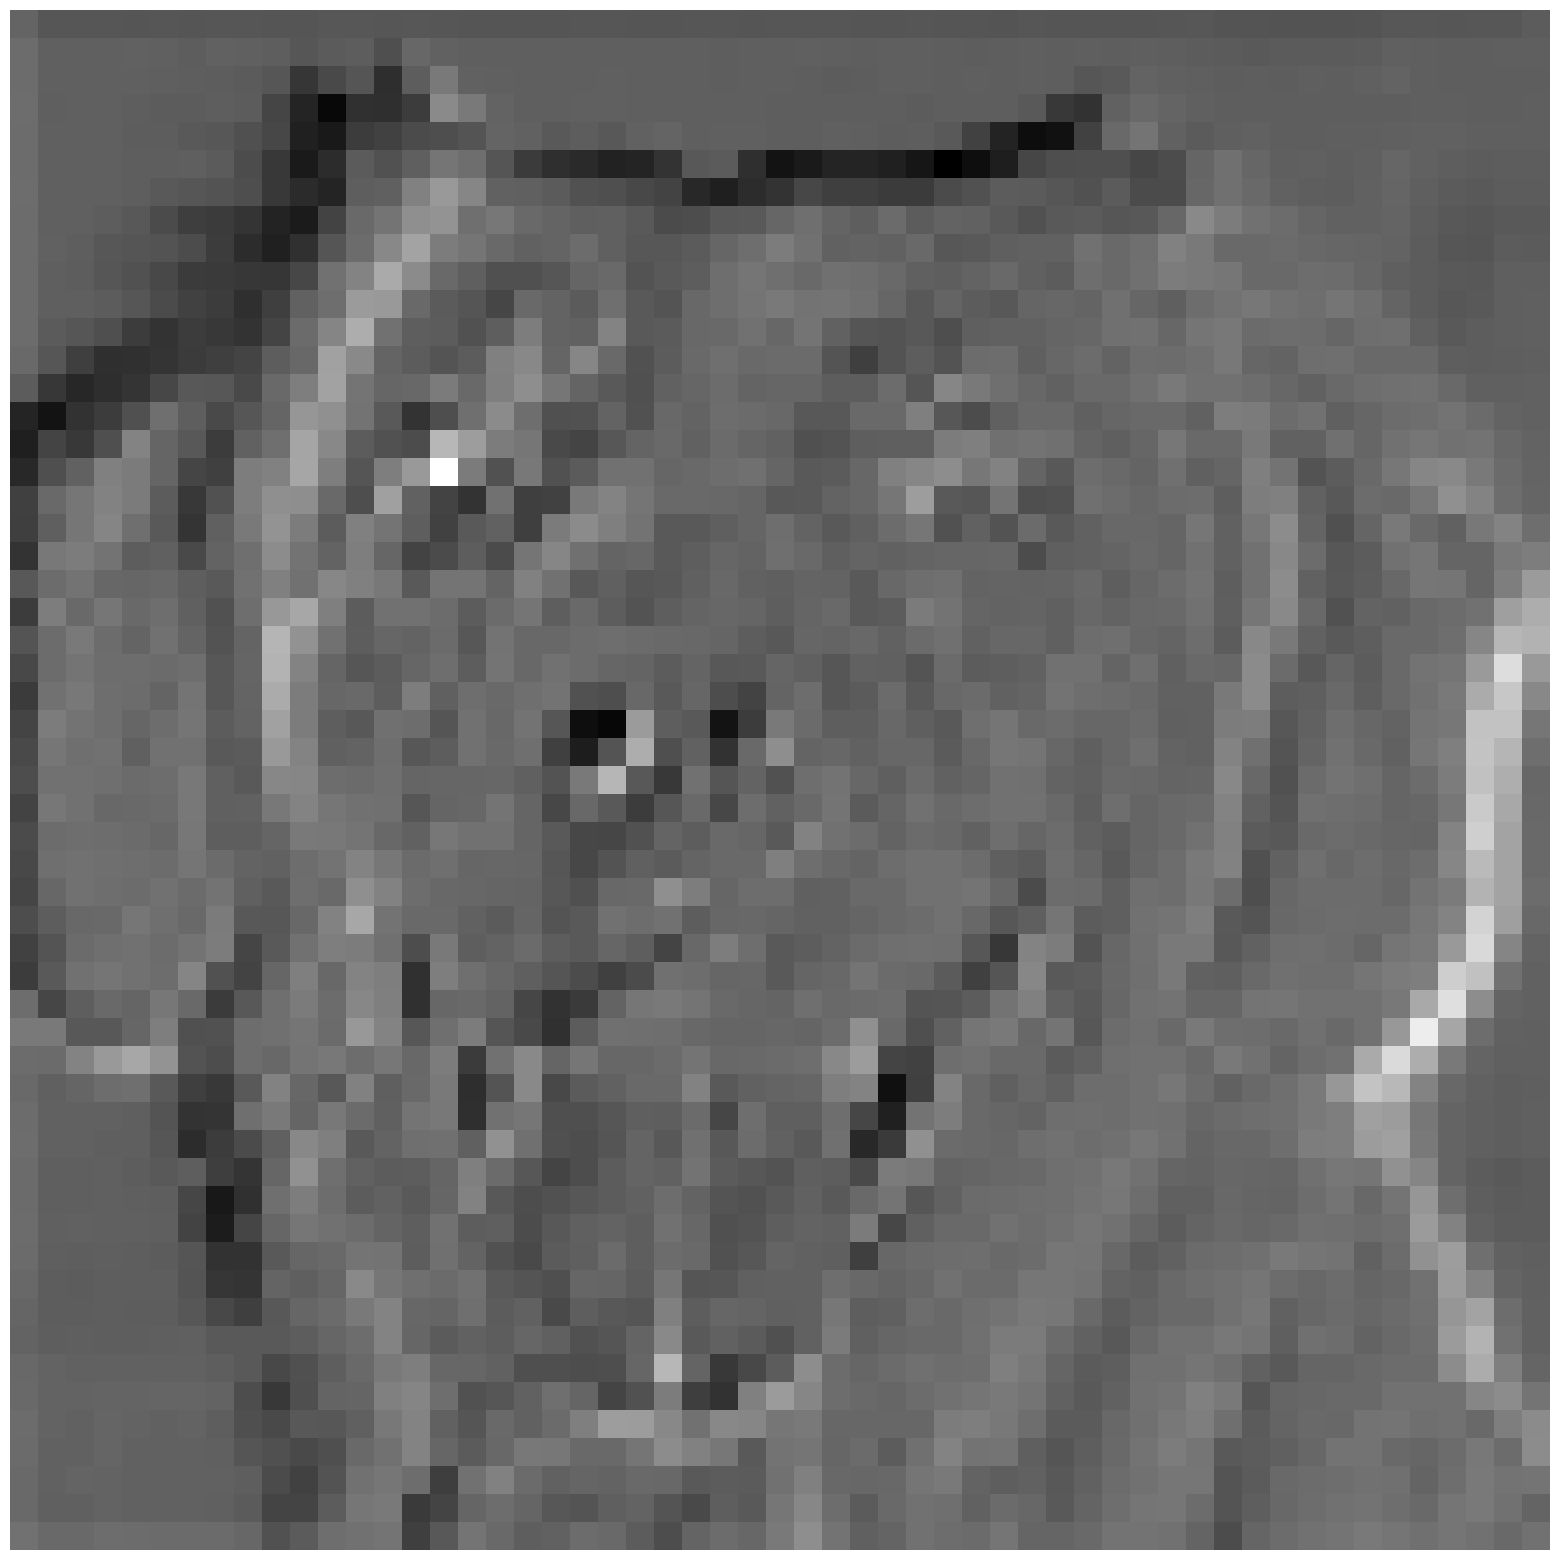

In [ ]:
#plots based on certain elements/indeces/arrays in out
plot(out[0,0,:,:])

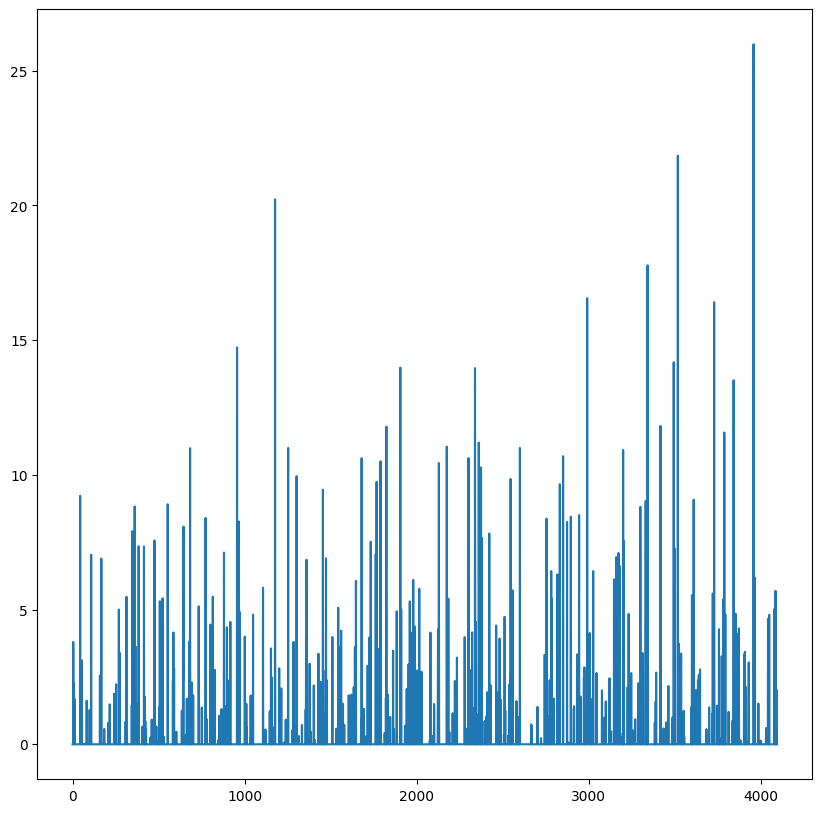

In [ ]:
plt.plot(np.arange(4096),net.classifier[0:6](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [ ]:
im = imageio.imread('http://bocasurfcam.com/most_recent_image.php')

<ipython-input-63-db4016f420a5>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('http://bocasurfcam.com/most_recent_image.php')


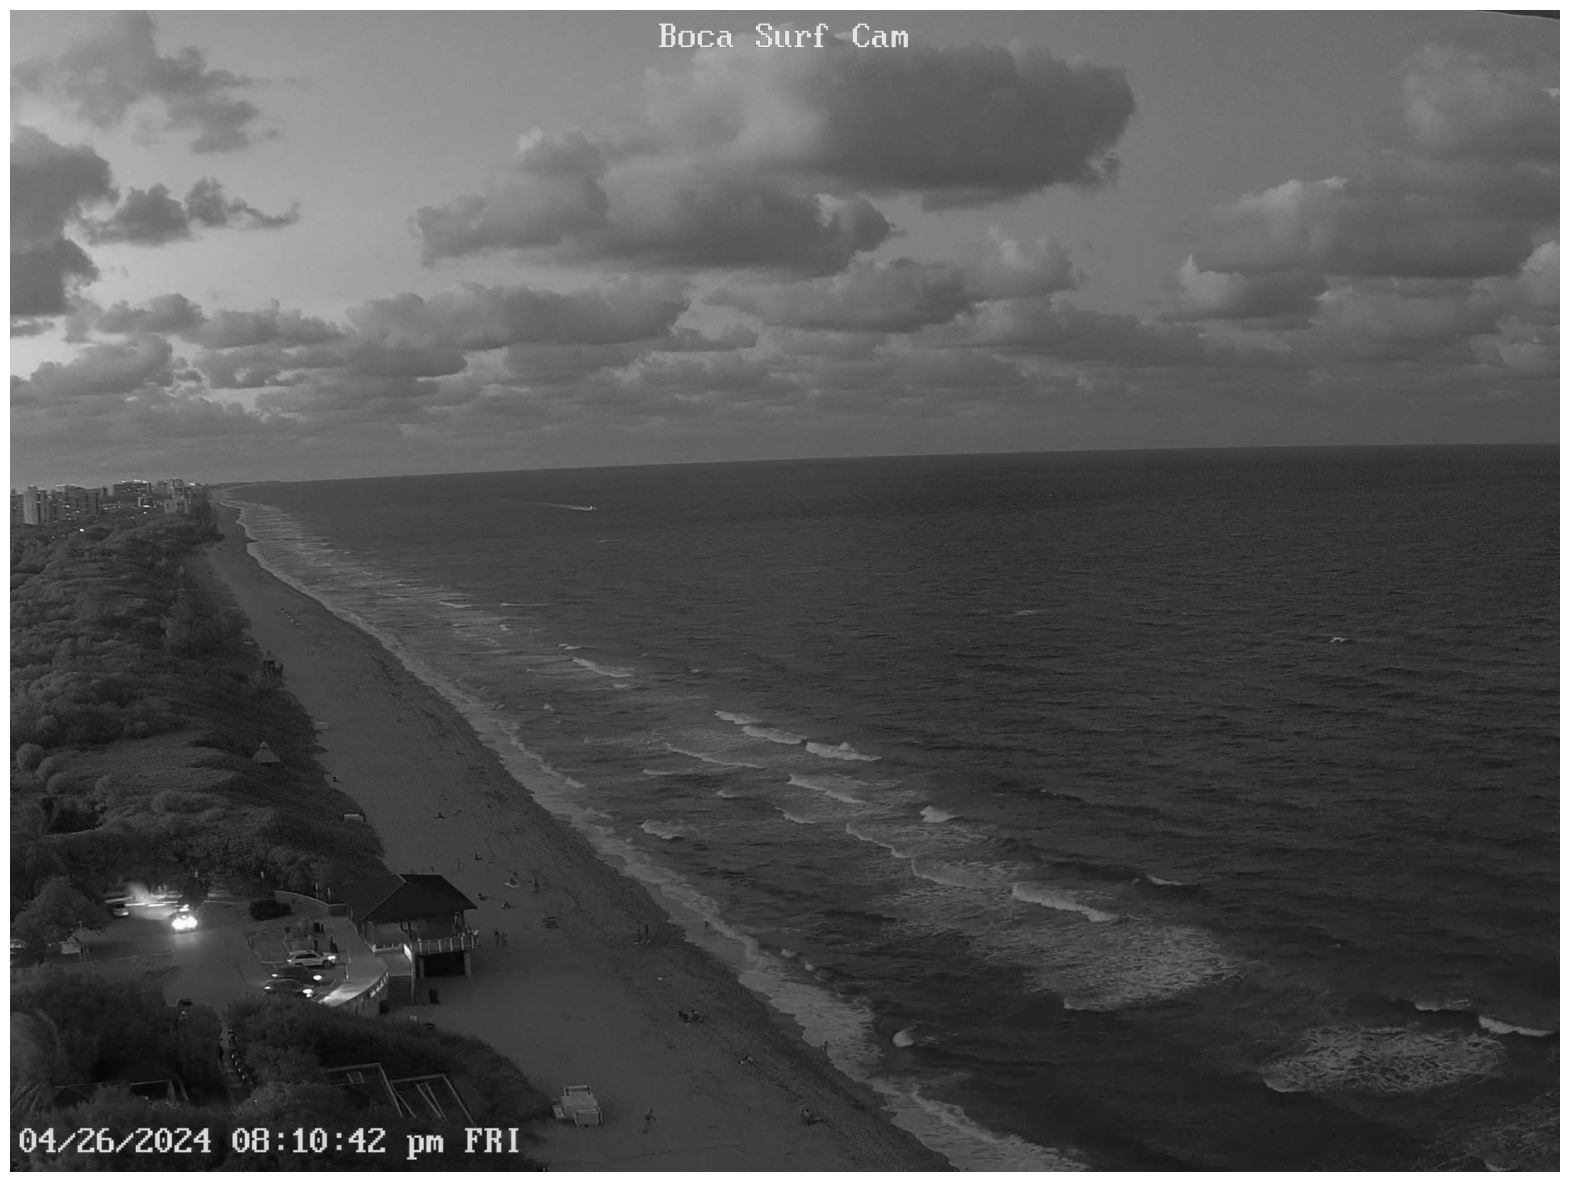

In [ ]:
plot(im)

In [ ]:
#designed to take an image array (im), preprocess it, and convert it into a PyTorch tensor that is ready for processing by a neural network model on a GPU.
def load_im(im):
    image = Image.fromarray(im) #convert to pil
    img_tensor = preprocess(image)
    img_tensor = img_tensor.unsqueeze_(0)
    img_variable = torch.tensor(img_tensor).cuda(0)
    return img_variable

In [ ]:
out = net(load_im(im))

<ipython-input-67-c28f393ccbd8>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


In [ ]:
#designed to process an image through a neural network, extract the predictions, and print the most likely class label along with the top 10 predicted class labels.
def inference(im):
    out = net(load_im(im))
    label_index = out.cpu().data.numpy().argmax()
    top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])
    print(labels[label_index])
    print('____')
    for i in range(10):
        print(labels[top_list[i]])

In [ ]:
inference(im)

wing
____
wing
aircraft carrier, carrier, flattop, attack aircraft carrier
breakwater, groin, groyne, mole, bulwark, seawall, jetty
wreck
volcano
promontory, headland, head, foreland
alp
seashore, coast, seacoast, sea-coast
warplane, military plane
suspension bridge


<ipython-input-67-c28f393ccbd8>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


# Restart Notebook (Disconnect and Delete Runtime) Before Running Next Section

# Custom Data Deck

In [71]:
#I completed this already, and uploaded my own photos on to a data deck. It is called "DataDeck Project (1) in my repository"
#re-did it here
#stationary chair vs. rolling chair
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [74]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [75]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

In [76]:
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [77]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

In [78]:
model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [79]:
url = "https://docs.google.com/presentation/d/1-SjYTjwdS3Lz12fZMcAn4pzDnZl-Z3MbKDFFc6QCFNo/edit#slide=id.g2c3ad41ad8b_0_196"

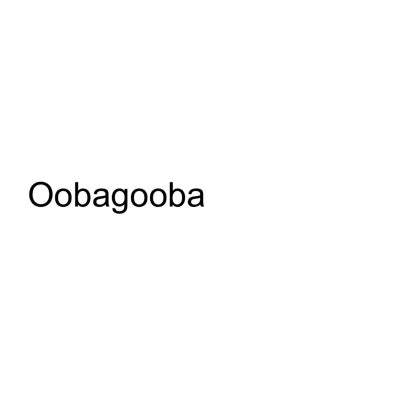

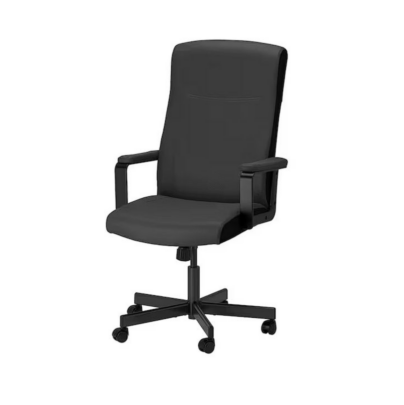

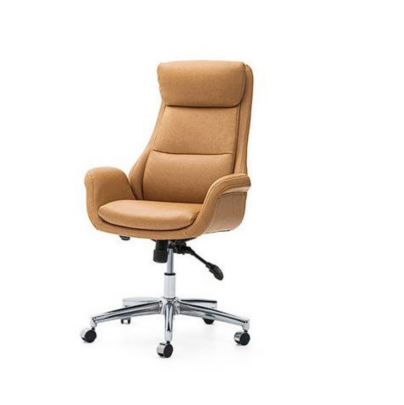

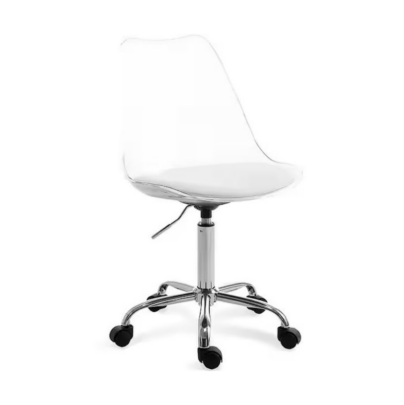

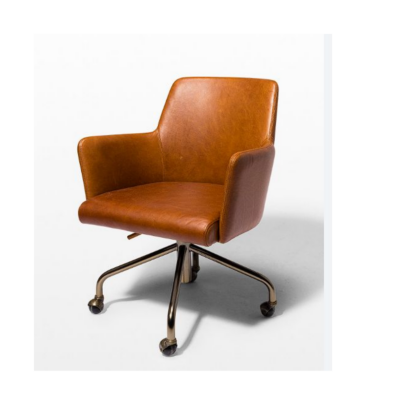

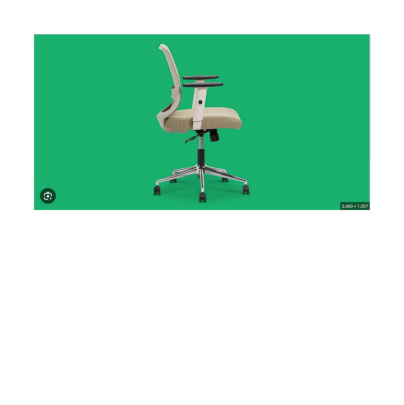

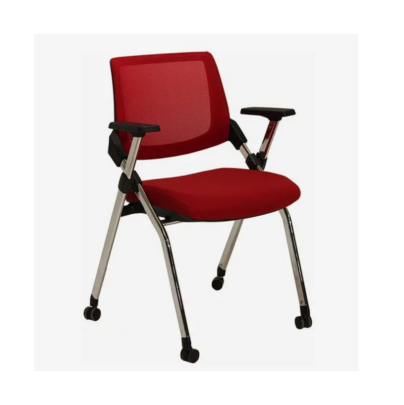

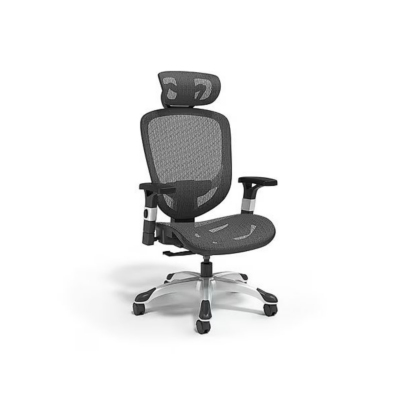

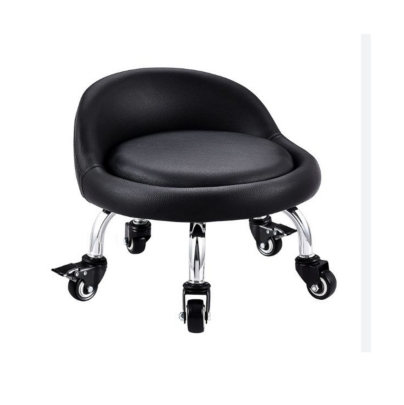

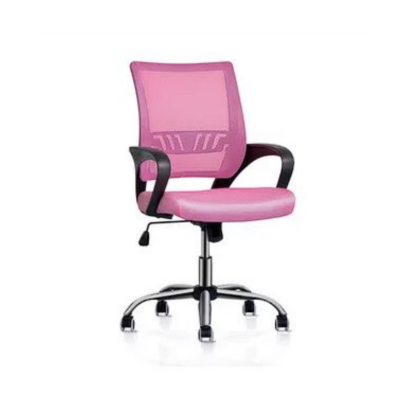

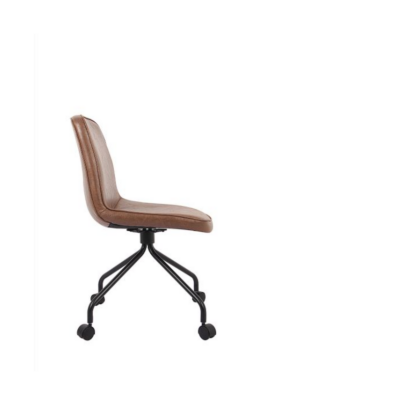

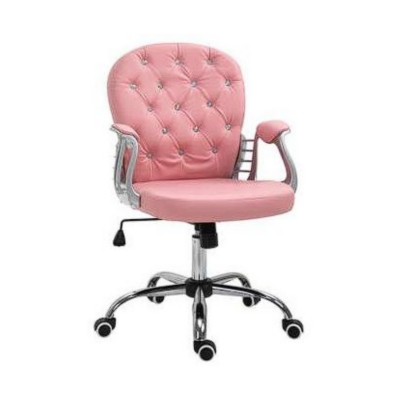

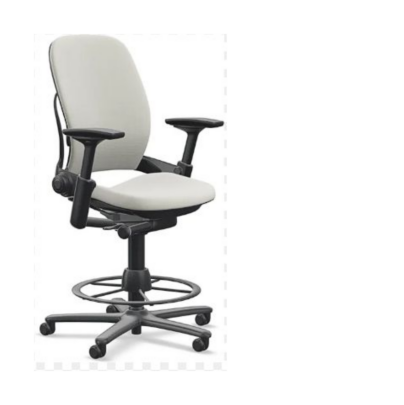

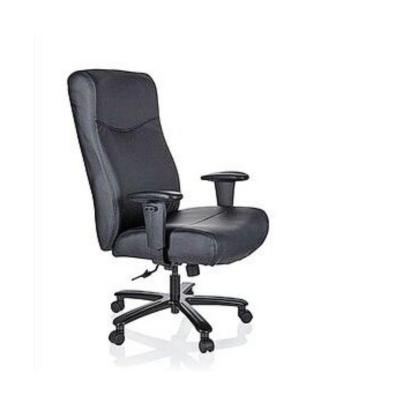

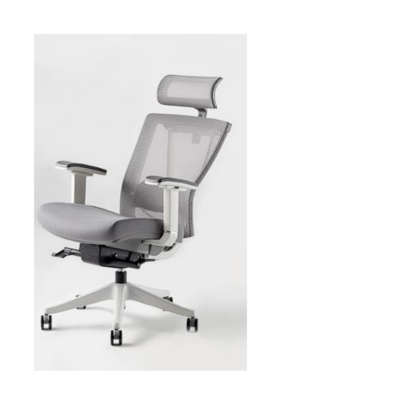

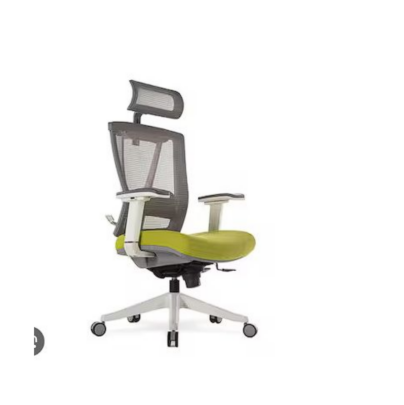

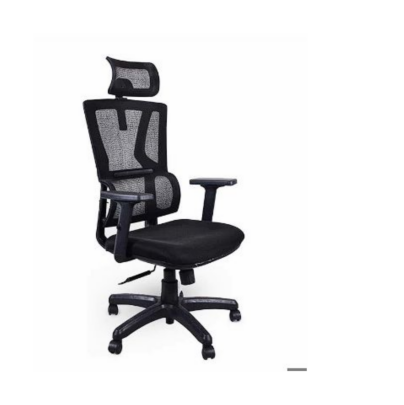

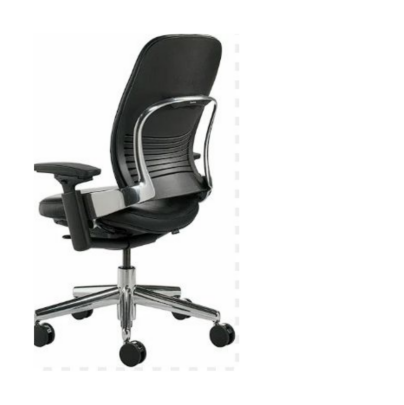

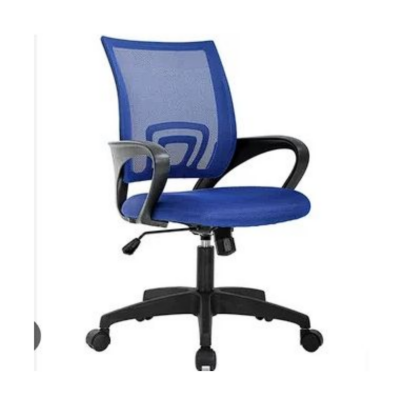

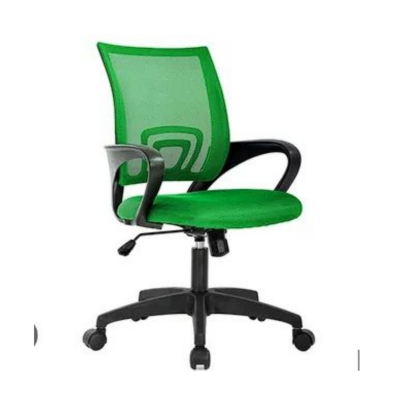

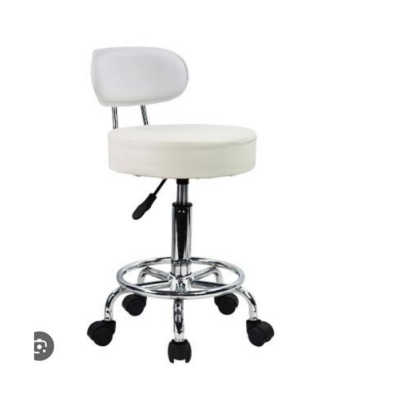

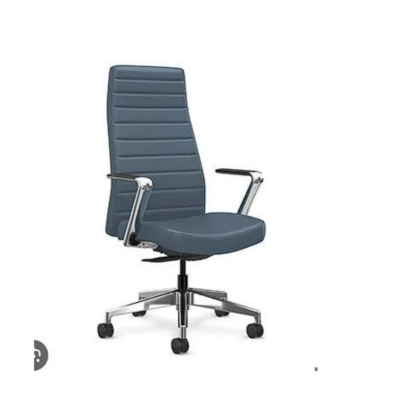

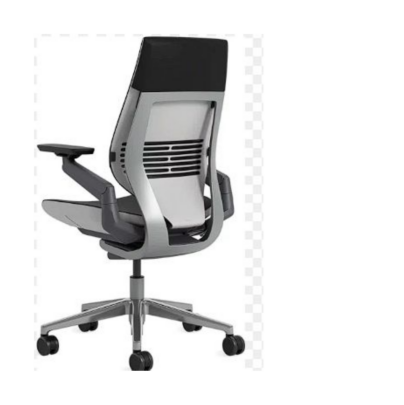

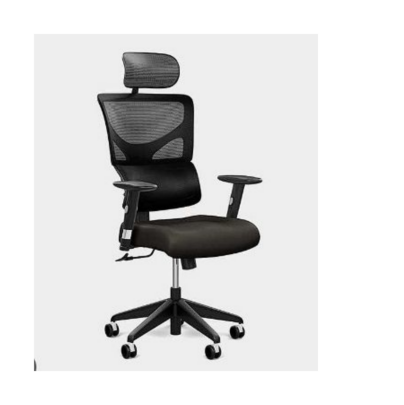

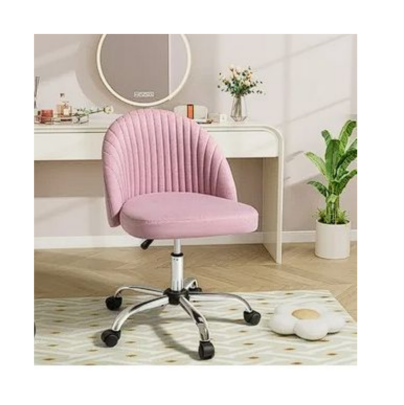

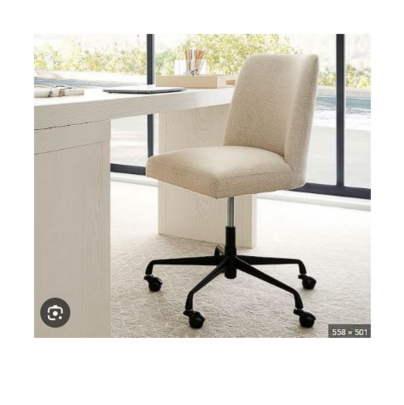

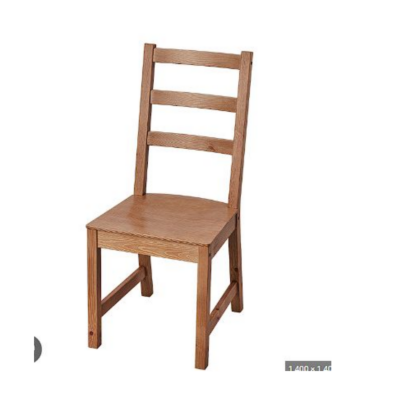

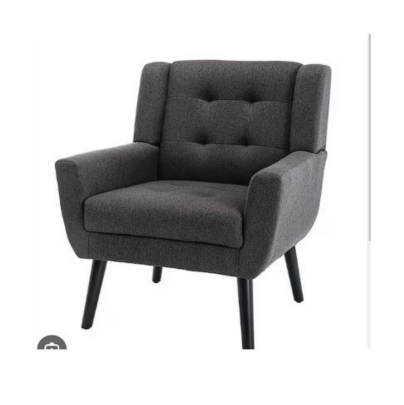

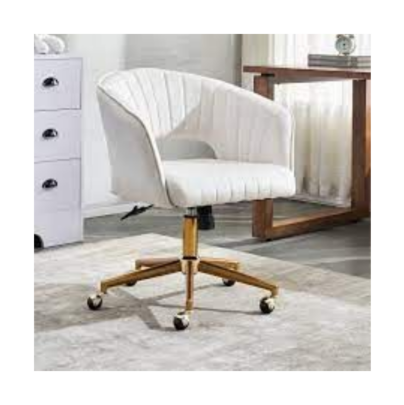

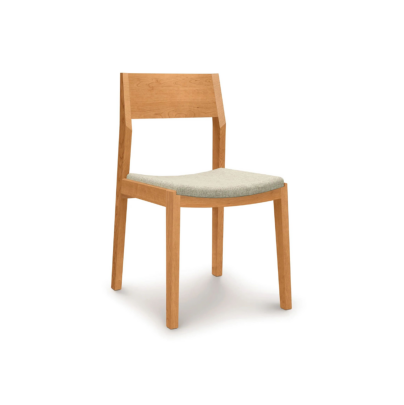

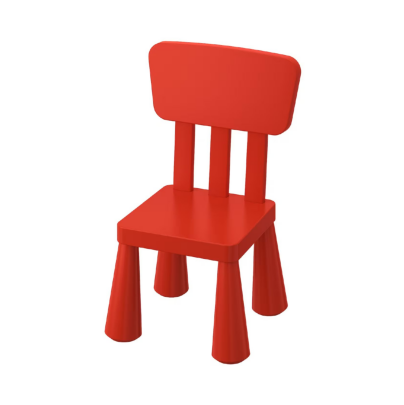

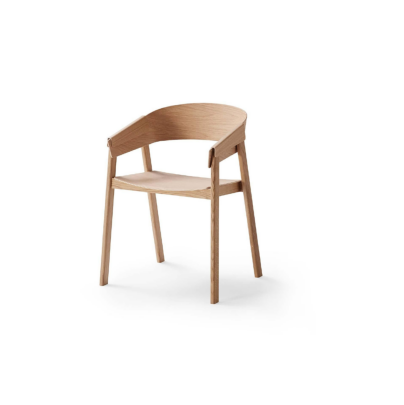

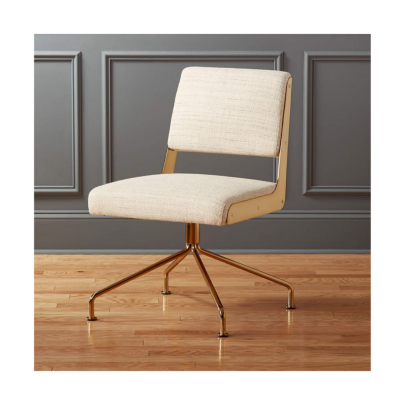

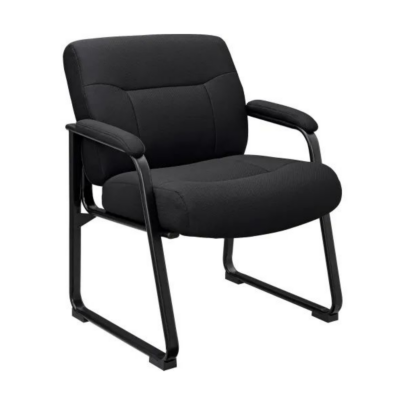

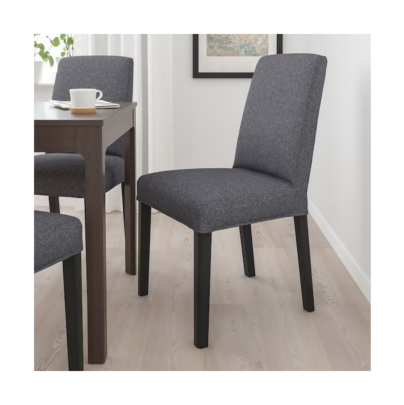

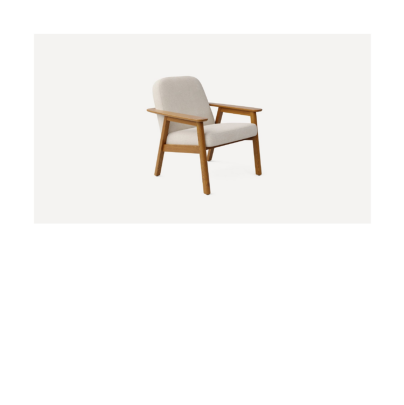

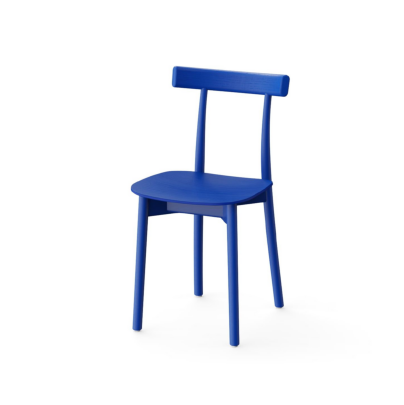

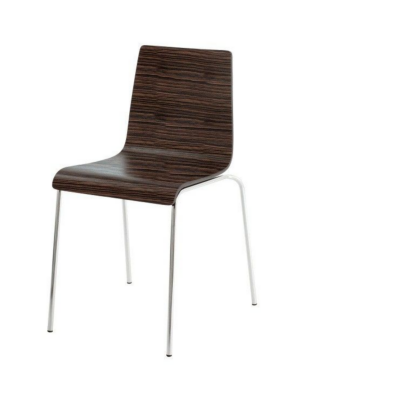

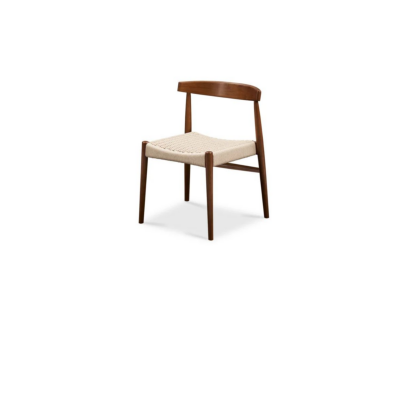

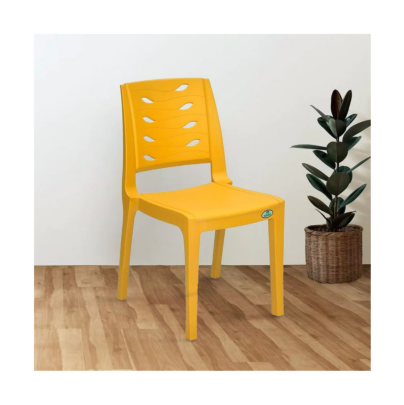

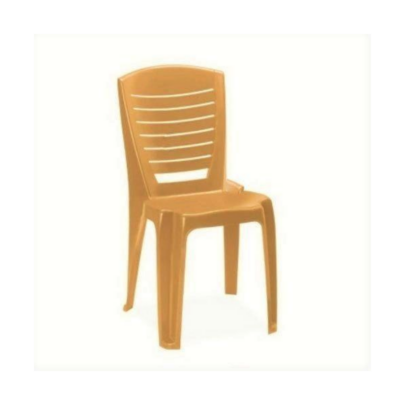

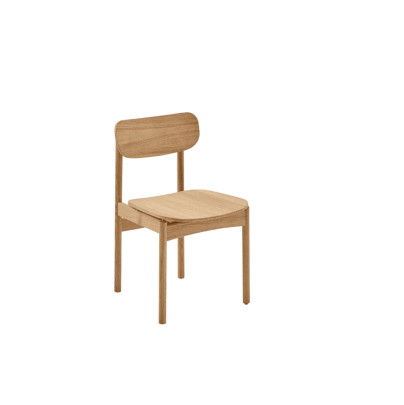

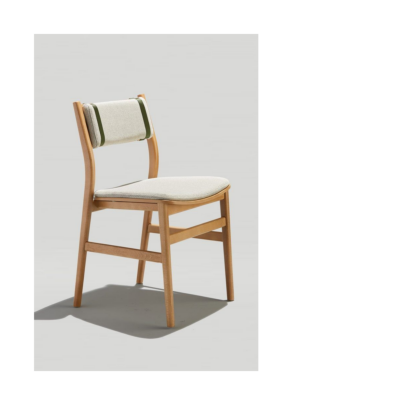

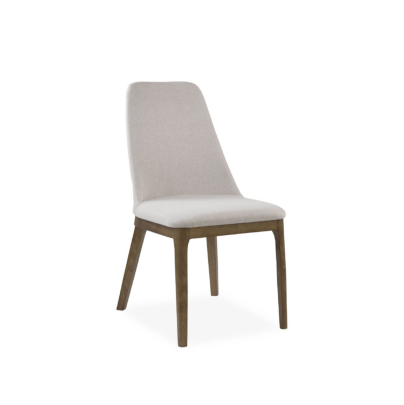

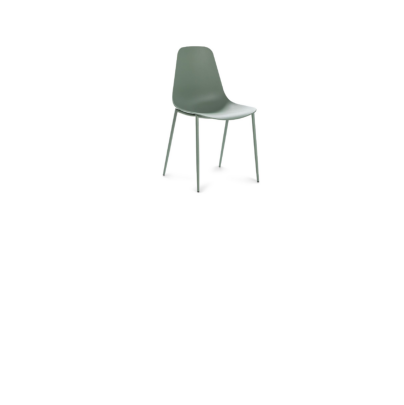

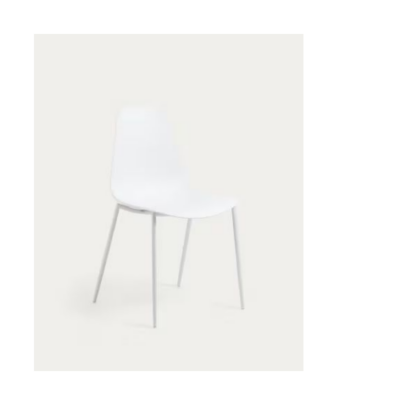

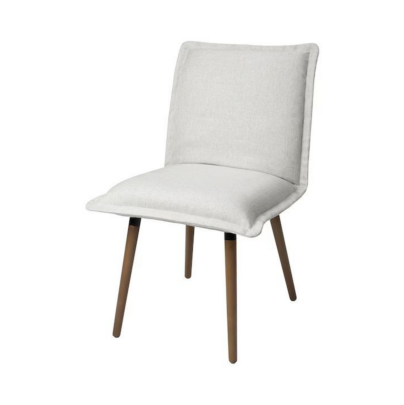

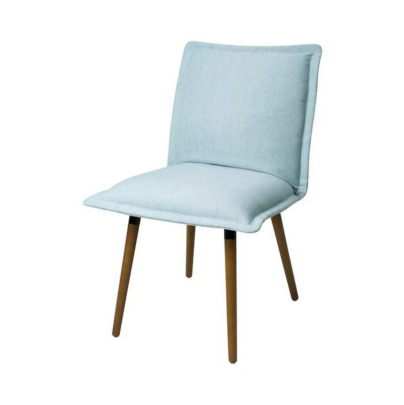

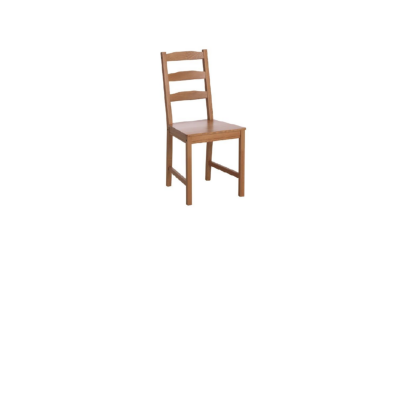

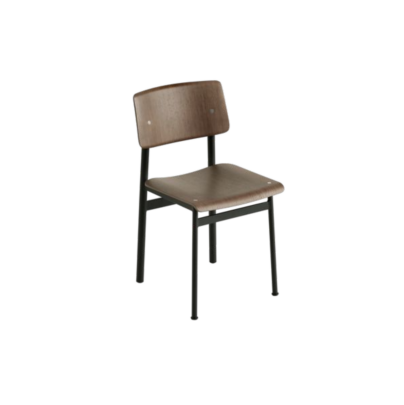

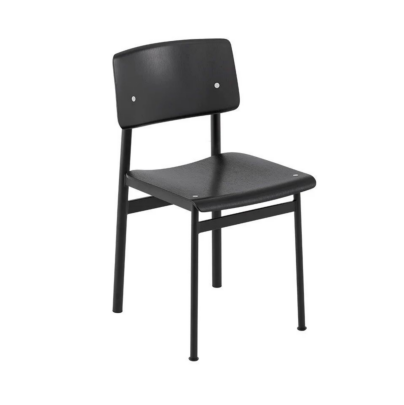

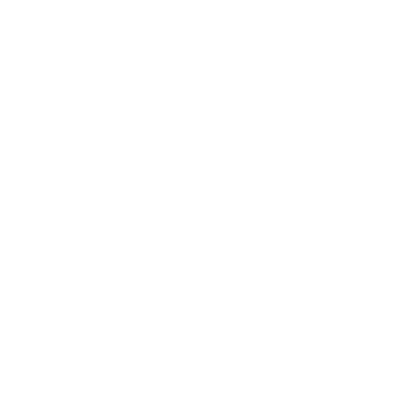

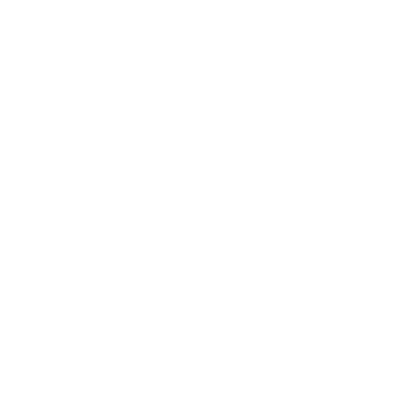

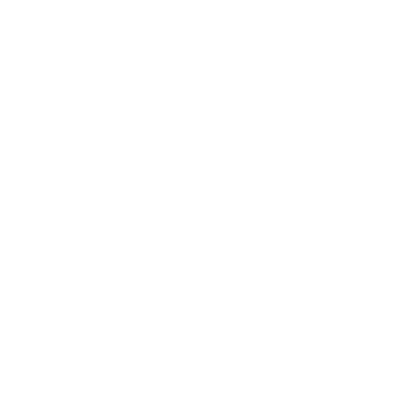

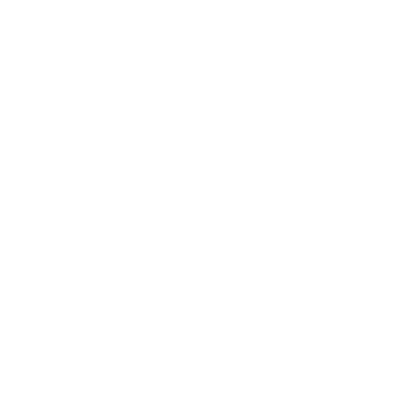

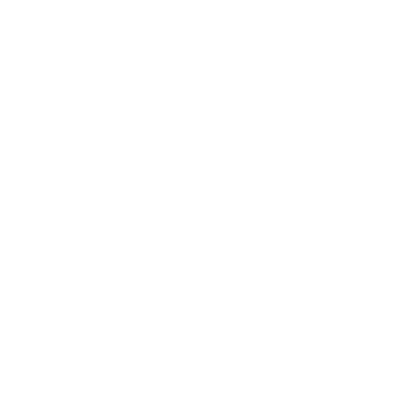

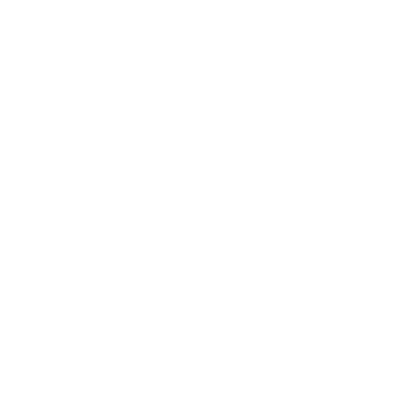

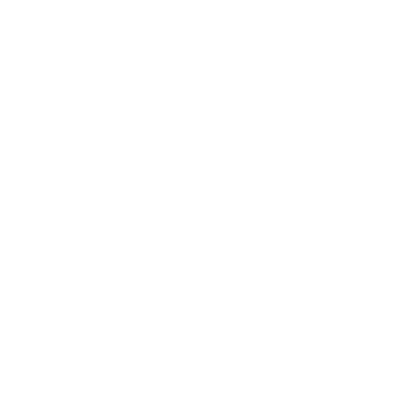

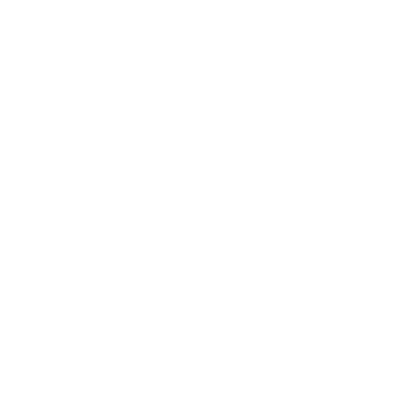

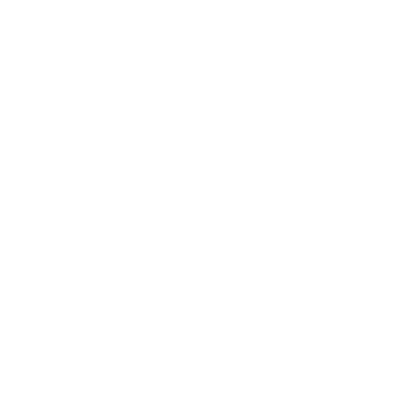

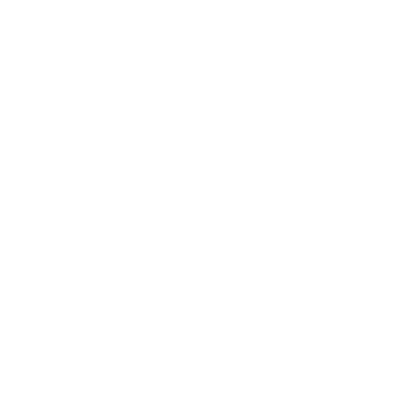

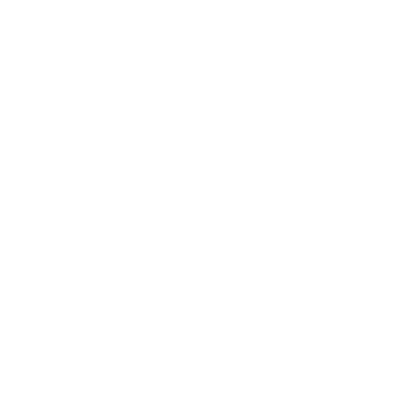

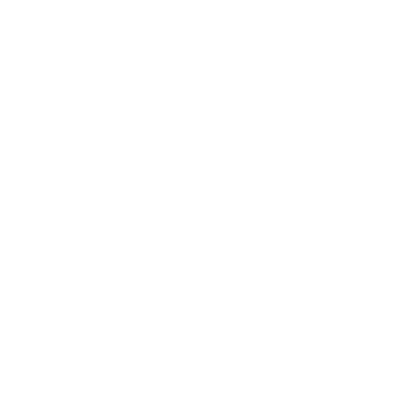

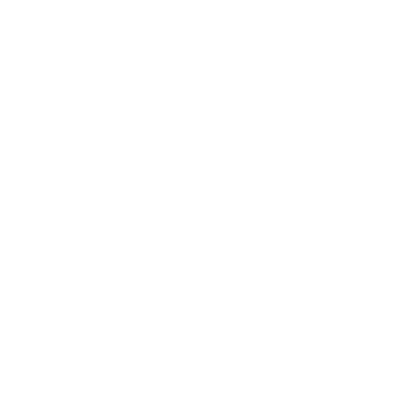

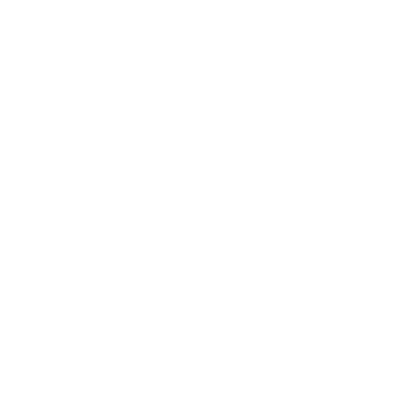

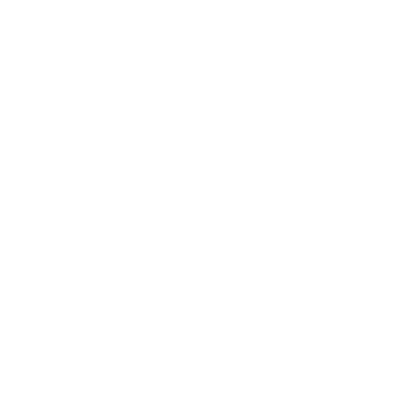

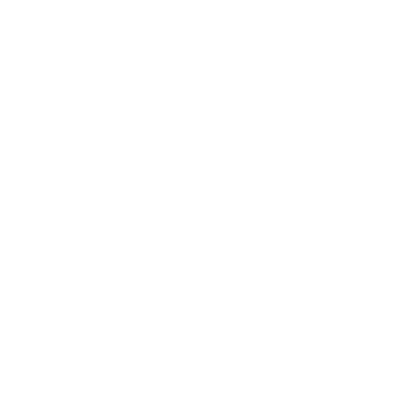

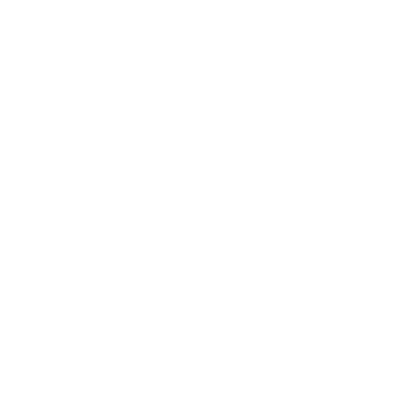

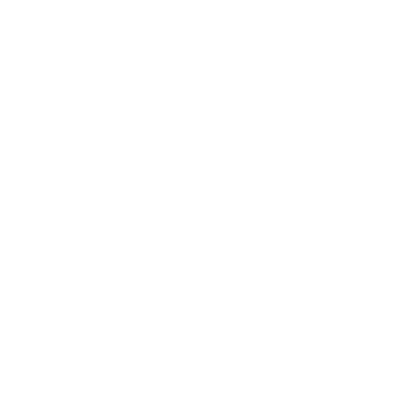

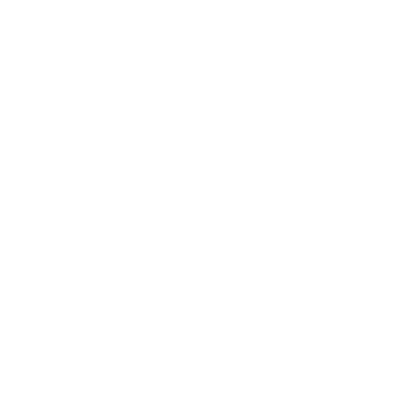

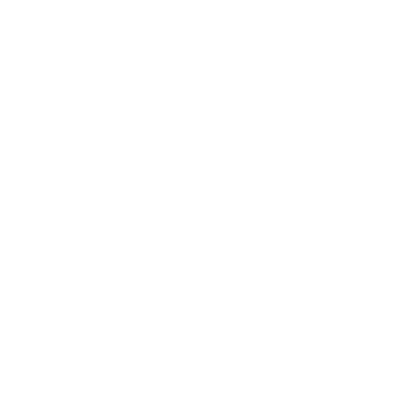

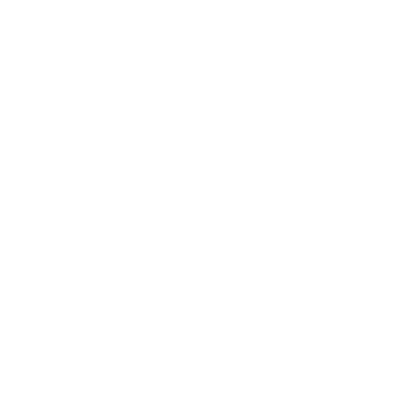

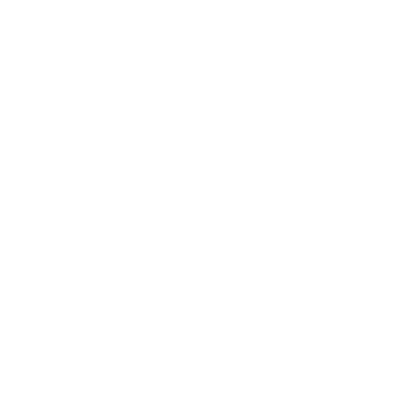

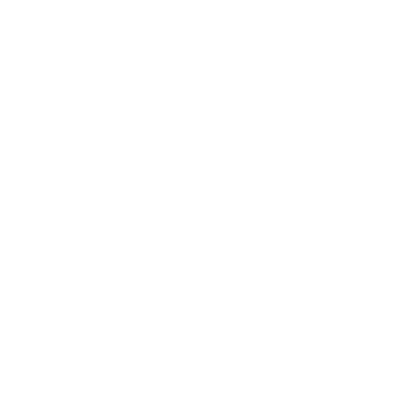

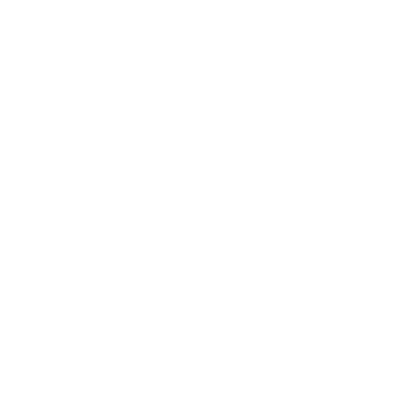

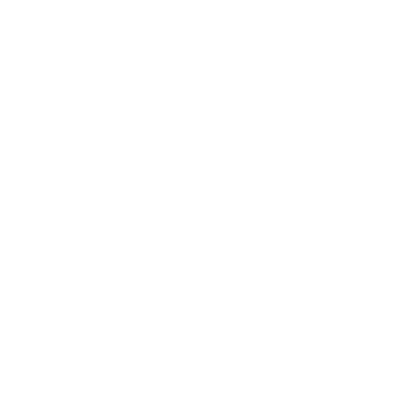

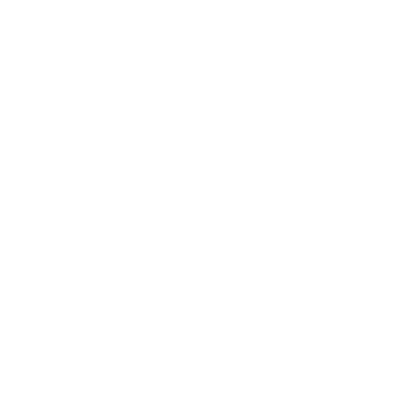

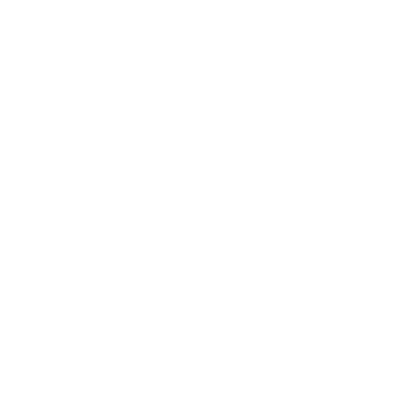

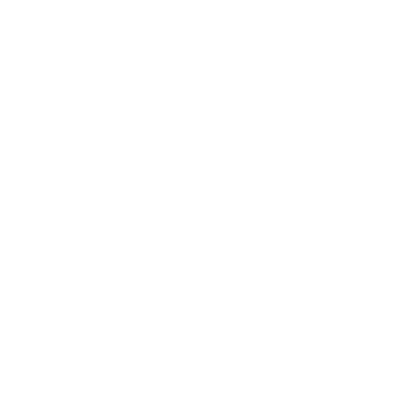

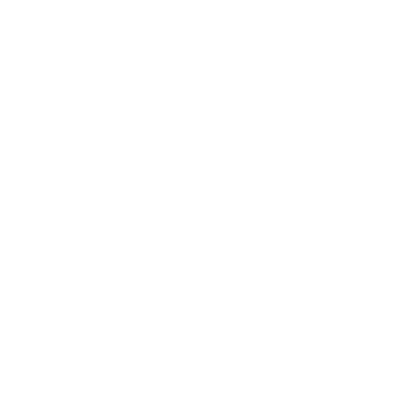

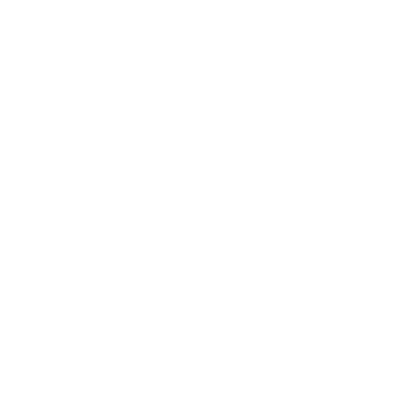

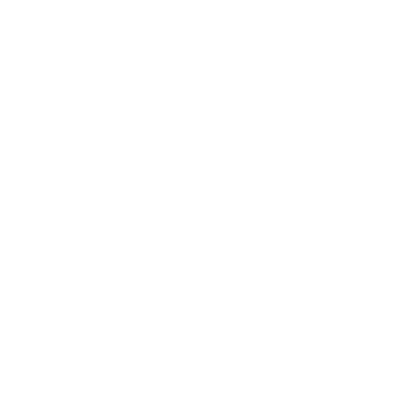

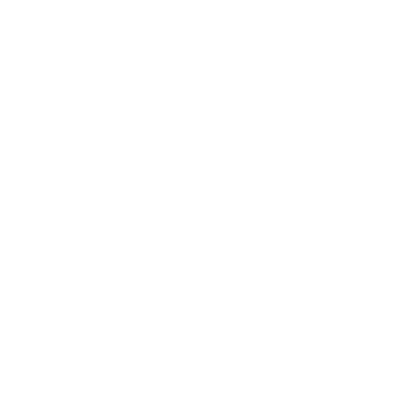

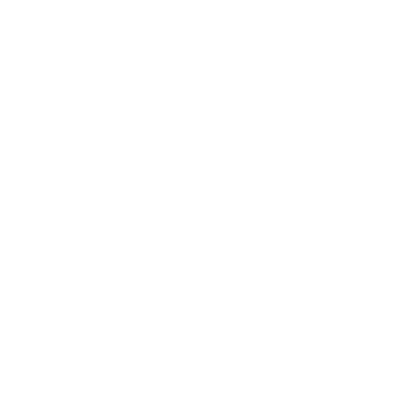

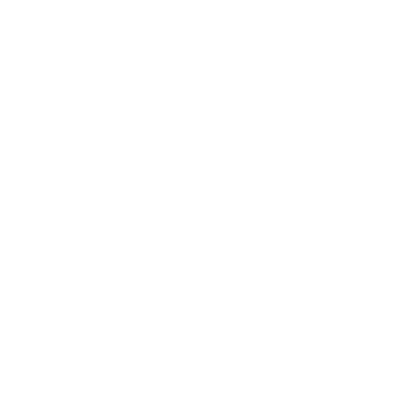

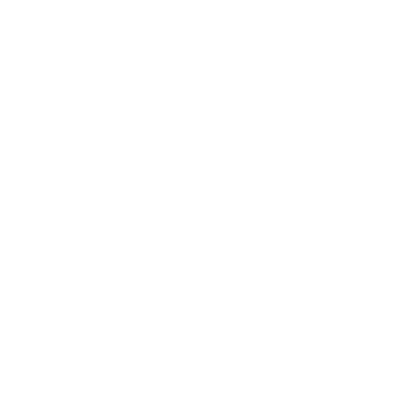

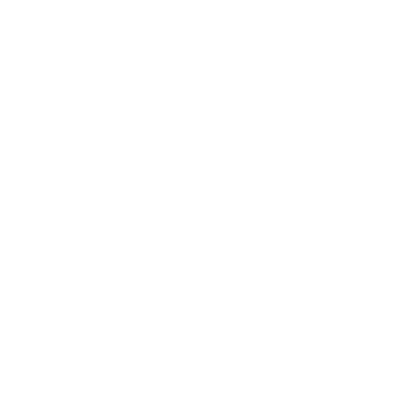

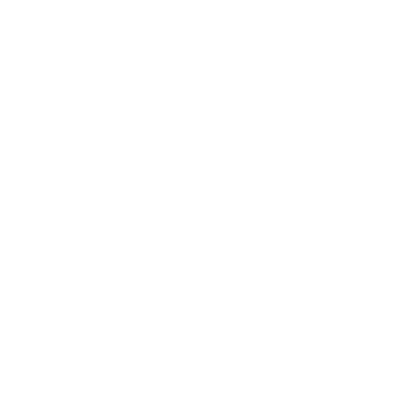

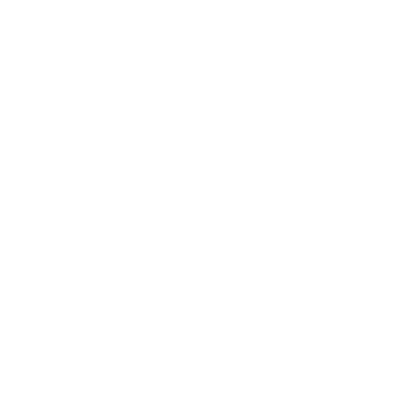

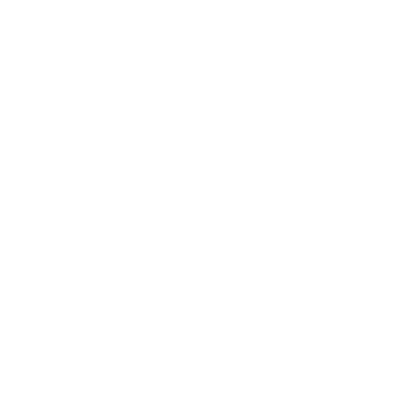

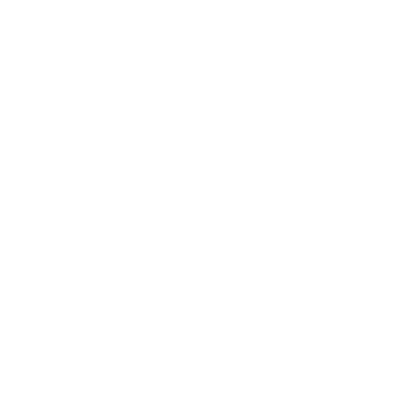

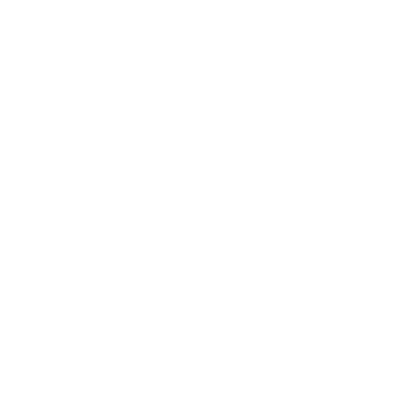

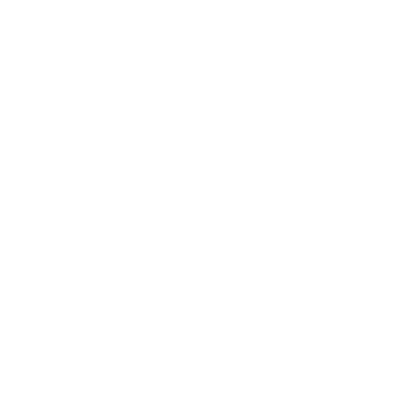

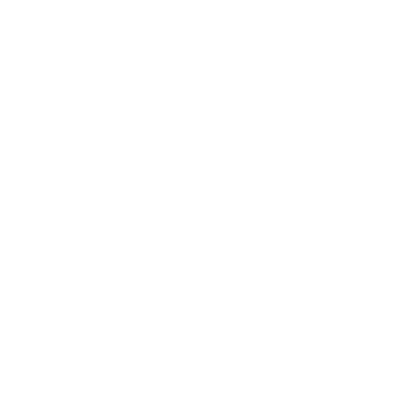

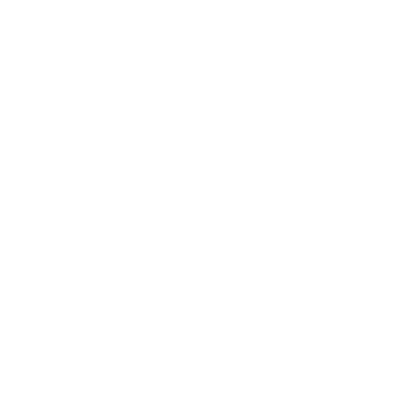

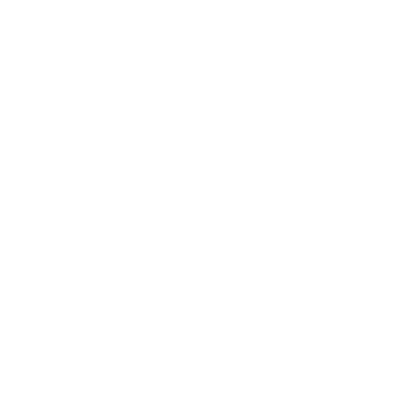

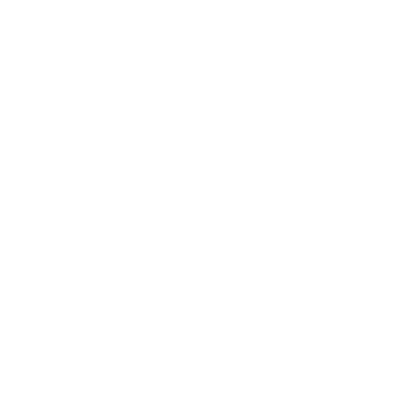

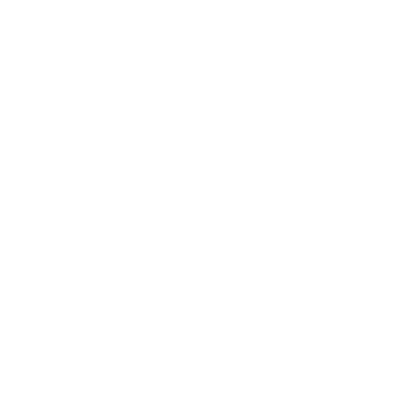

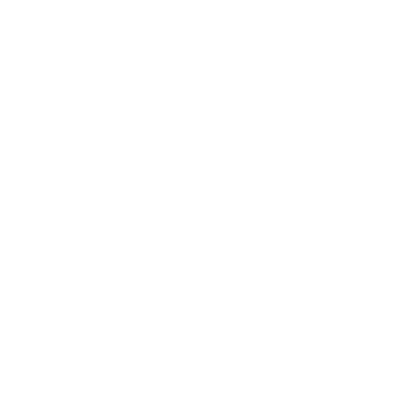

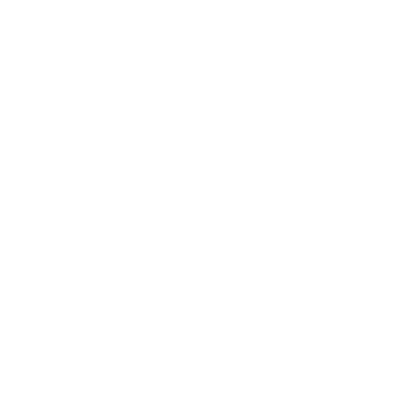

In [80]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [81]:
images.shape

torch.Size([100, 3, 224, 224])

In [82]:
model(images)

tensor([[-0.0379, -0.4117, -1.8217,  ..., -3.4859, -0.4623,  1.2855],
        [-4.9740, -8.6494, -2.0682,  ..., -3.6647, -3.6118,  3.5221],
        [-3.4718, -5.5893, -3.4599,  ...,  0.8386, -0.1098,  5.7455],
        ...,
        [ 0.3832,  0.4531, -2.1674,  ..., -2.5195,  0.1401,  0.9634],
        [ 0.3832,  0.4531, -2.1674,  ..., -2.5195,  0.1401,  0.9634],
        [ 0.3832,  0.4531, -2.1674,  ..., -2.5195,  0.1401,  0.9634]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [83]:
y = model(images)

In [84]:
y.shape

torch.Size([100, 1000])

In [85]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [86]:
for i in list(guesses):
    print(labels[i])

cleaver, meat cleaver, chopper
loudspeaker, speaker, speaker unit, loudspeaker system, speaker system
barber chair
barber chair
barber chair
binder, ring-binder
folding chair
barber chair
wok
barber chair
spoonbill
corkscrew, bottle screw
barber chair
barber chair
sewing machine
stretcher
barber chair
barber chair
barber chair
barber chair
soap dispenser
stretcher
microphone, mike
barber chair
plate rack
desk
folding chair
studio couch, day bed
desk
folding chair
digital clock
folding chair
folding chair
barber chair
dining table, board
dining table, board
desk
folding chair
dining table, board
dining table, board
folding chair
desk
rocking chair, rocker
folding chair
nail
switch, electric switch, electrical switch
folding chair
folding chair
dining table, board
desk
dining table, board
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter 

In [87]:
Y = np.zeros(50,)
Y[25:] = 1

In [88]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [89]:
X = y.detach().cpu().numpy()

In [90]:
X.shape

(100, 1000)

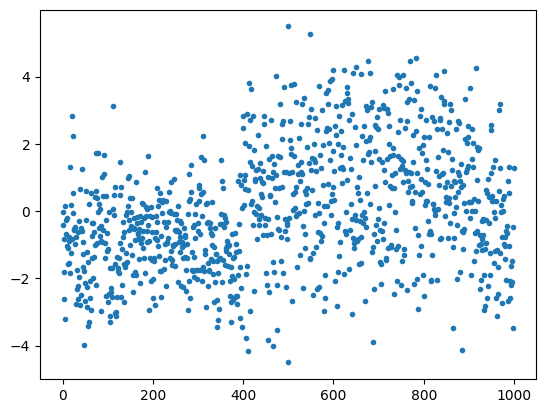

In [91]:
plt.plot(X[0],'.')

In [92]:
X[0]

array([-3.79312038e-02, -4.11652654e-01, -1.82170630e+00, -2.61005831e+00,
       -8.41542900e-01,  1.54759020e-01, -3.20614958e+00, -2.68661141e-01,
       -6.77207232e-01, -1.04053485e+00, -1.99061662e-01, -1.09945786e+00,
       -1.57119679e+00, -7.60123968e-01, -1.54294777e+00, -8.92735720e-01,
        1.30690038e+00, -1.84298265e+00,  1.85529262e-01, -1.23321855e+00,
       -8.41455042e-01,  2.83401871e+00,  2.23255920e+00,  5.34638226e-01,
       -4.95423675e-02, -5.62543988e-01, -5.22568882e-01, -9.79059696e-01,
       -4.81822252e-01, -7.62027204e-01, -2.75988650e+00, -1.76424563e+00,
       -2.32112193e+00, -2.22200418e+00, -6.34296417e-01, -2.60578871e+00,
       -2.92469919e-01, -1.96760798e+00,  6.66051447e-01, -2.78592944e+00,
       -2.50478148e+00, -4.98689353e-01, -5.82598746e-01,  1.23747754e+00,
       -1.26294374e+00, -9.19181406e-01, -1.66716146e+00, -1.79053485e+00,
       -3.99000931e+00, -2.67340803e+00, -2.14522743e+00, -2.67351657e-01,
        5.90150714e-01, -

In [93]:
np.argmax(X[0])

499

In [94]:
labels[948]

'Granny Smith'

In [95]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [98]:
for i in top_ten:
    print(labels[i])

cleaver, meat cleaver, chopper
envelope
screw
nail
rule, ruler
microphone, mike
web site, website, internet site, site
letter opener, paper knife, paperknife
hook, claw
syringe


In [97]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([  9.,  65., 130., 222., 213., 158.,  92.,  72.,  36.,   3.]),
 array([-4.50021029, -3.50149107, -2.50277209, -1.50405288, -0.50533378,
         0.49338531,  1.49210441,  2.49082351,  3.48954272,  4.4882617 ,
         5.48698092]),
 <BarContainer object of 10 artists>)

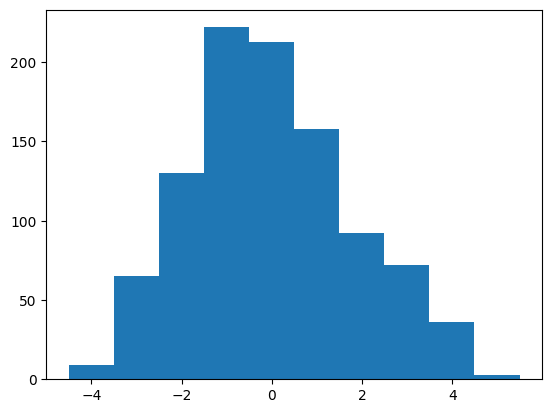

In [99]:
plt.hist(X[0])

In [100]:
X = GPU_data(X)
Y = GPU_data(Y)

In [101]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [102]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [103]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [104]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [105]:
X.shape

torch.Size([100, 1000])

In [106]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [107]:
def model(x,w):

    return x@w[0]

In [108]:
def make_plots():

    acc_train = acc(model(x,w),y)

    wb.log({"acc_train": acc_train})

In [109]:
#not sure why I am getting this error. I made my own W&B account and everything. Multiple students I consulted also had this error
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 4
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-74-c3d856de2607>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [4], [0]